In [2]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict

In [63]:
# Define State
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    bpb: float
    boundary_percent: float
    summary: str

In [105]:
# Calculate Strike-Rate
def cal_sr(state:BatsmanState):

    runs = state["runs"]
    balls = state["balls"]

    sr = (runs/balls)*100
    
    return {"strike_rate":sr} 

In [117]:
# Calculate Ball per boundary
def cal_bpb(state:BatsmanState):

    bpb = round((state['balls']/(state["fours"]+state["sixes"])),2)
    return {"bpb":bpb}

In [118]:
# Calsulate Boundary Percentage
def boundary_per(state:BatsmanState):

    runs = state["runs"]
    sixes = state["sixes"]
    fours = state["fours"]

    b_per = ((sixes*6)+(fours*4))/runs*100
    return {"boundary_percent":b_per}

In [119]:
# Summary
def summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['strike_rate']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    
    return {'summary': summary}

In [120]:
# Define Graph
graph = StateGraph(BatsmanState)

# Adding nodes
graph.add_node("cal_sr",cal_sr)
graph.add_node("b_per",boundary_per)
graph.add_node("bpb",cal_bpb)
graph.add_node("summary",summary)

# Adding Edges
graph.add_edge(START,"cal_sr")
graph.add_edge(START,"b_per")
graph.add_edge(START,"bpb")

graph.add_edge("cal_sr","summary")
graph.add_edge("b_per","summary")
graph.add_edge("bpb","summary")

graph.add_edge("summary",END)

workflow = graph.compile()

In [121]:
intial_sate = {"runs":100,"balls":80,"fours":10,"sixes":5}

In [122]:
final_state = workflow.invoke(intial_sate)
final_state

{'runs': 100,
 'balls': 80,
 'fours': 10,
 'sixes': 5,
 'strike_rate': 125.0,
 'bpb': 5.33,
 'boundary_percent': 70.0,
 'summary': '\nStrike Rate - 125.0 \n\nBalls per boundary - 5.33 \n\nBoundary percent - 70.0\n'}

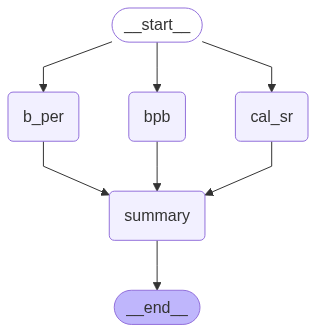

In [61]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())